## Data Preprocessing

In [2]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'Annual GDP.csv'
gdp_data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
gdp_data.head(), gdp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes


(   Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                       15,108,806                    5.6   
 1  2022                       13,489,642                    4.9   
 2  2021                       12,027,662                    7.6   
 3  2020                       10,715,070                   -0.3   
 4  2019                       10,237,727                    5.1   
 
   Real GDP prices (Ksh Million)  
 0                    10,399,980  
 1                     9,852,583  
 2                     9,395,942  
 3                     8,733,060  
 4                     8,756,946  ,
 None)

In [3]:
# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Confirm changes by displaying the updated data types and first few rows
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


(   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                        15108806.0                    5.6   
 1  2022                        13489642.0                    4.9   
 2  2021                        12027662.0                    7.6   
 3  2020                        10715070.0                   -0.3   
 4  2019                        10237727.0                    5.1   
 
    Real GDP prices (Ksh Million)  
 0                     10399980.0  
 1                      9852583.0  
 2                      9395942.0  
 3                      8733060.0  
 4                      8756946.0  ,
 None)

## visualizing trends in GDP over time

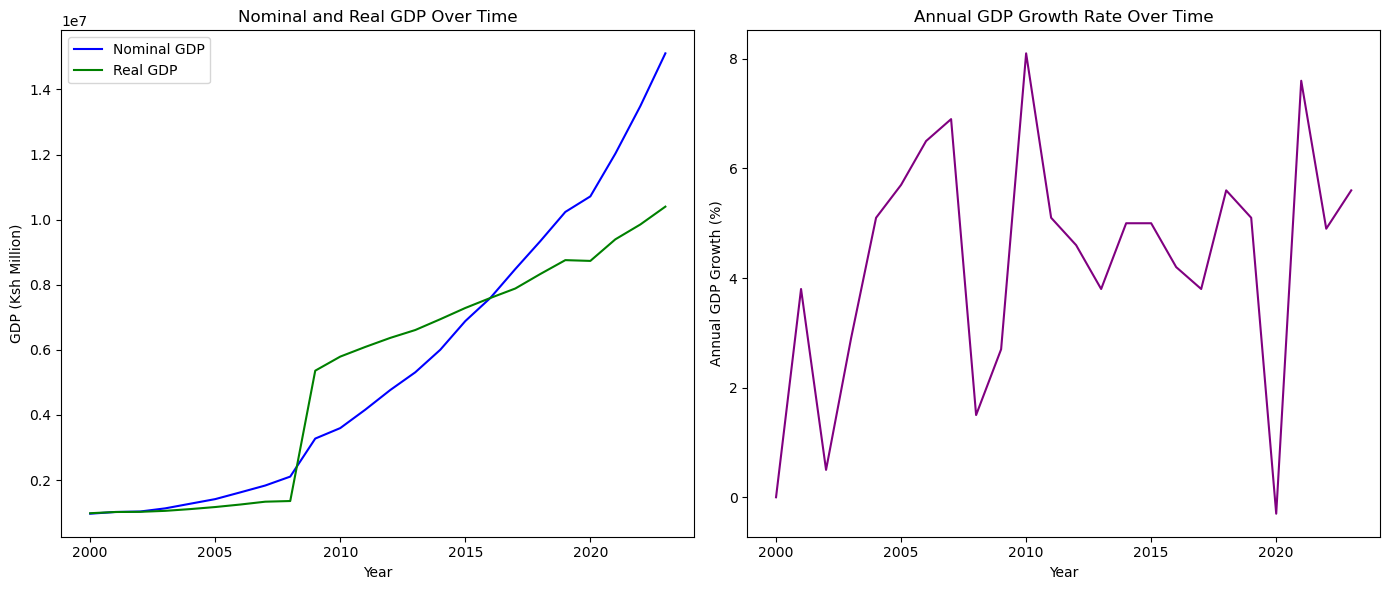

In [5]:
import matplotlib.pyplot as plt

# Set up the figure and axes for multiple plots
plt.figure(figsize=(14, 6))

# Plot Nominal and Real GDP over time
plt.subplot(1, 2, 1)
plt.plot(gdp_data['Year'], gdp_data['Nominal GDP prices (Ksh Million)'], label="Nominal GDP", color="blue")
plt.plot(gdp_data['Year'], gdp_data['Real GDP prices (Ksh Million)'], label="Real GDP", color="green")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.title("Nominal and Real GDP Over Time")
plt.legend()

# Plot Annual GDP growth rate over time
plt.subplot(1, 2, 2)
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], color="purple")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Annual GDP Growth Rate Over Time")

plt.tight_layout()
plt.show()

## Enhanced GDP Growth Rate Analysis

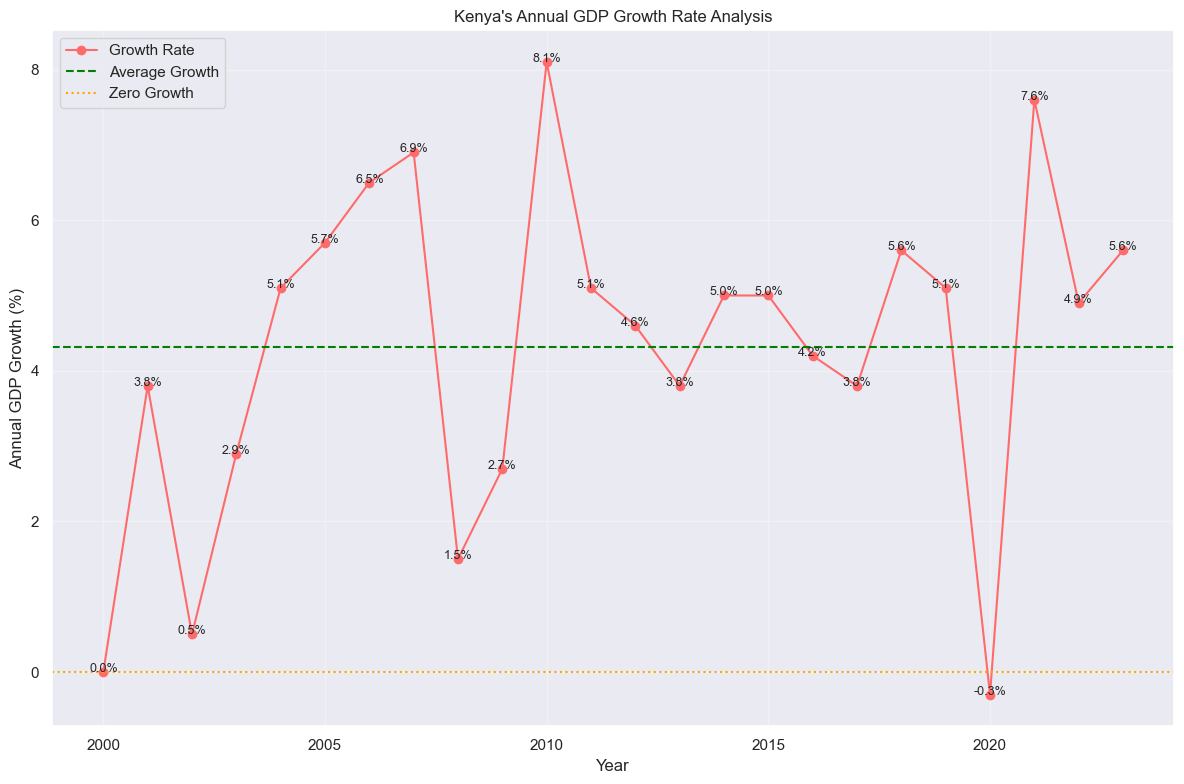

count    24.000000
mean      4.320833
std       2.214768
min      -0.300000
25%       3.575000
50%       4.950000
75%       5.600000
max       8.100000
Name: Annual GDP growth (%), dtype: float64


In [7]:
import seaborn as sns
import numpy as np
from scipy import stats

# Set Seaborn theme
sns.set_theme()

# Create a detailed GDP growth rate plot
plt.figure(figsize=(12, 8))
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], 'o-', color='#FF6B6B', label="Growth Rate")
plt.axhline(y=gdp_data['Annual GDP growth (%)'].mean(), linestyle='--', color='green', label="Average Growth")
plt.axhline(y=0, linestyle=':', color='orange', label="Zero Growth")

# Annotate data points
for year, growth in zip(gdp_data['Year'], gdp_data['Annual GDP growth (%)']):
    plt.text(year, growth, f'{growth:.1f}%', ha='center', fontsize=9)

plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Kenya's Annual GDP Growth Rate Analysis")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistical summary
print(gdp_data['Annual GDP growth (%)'].describe())

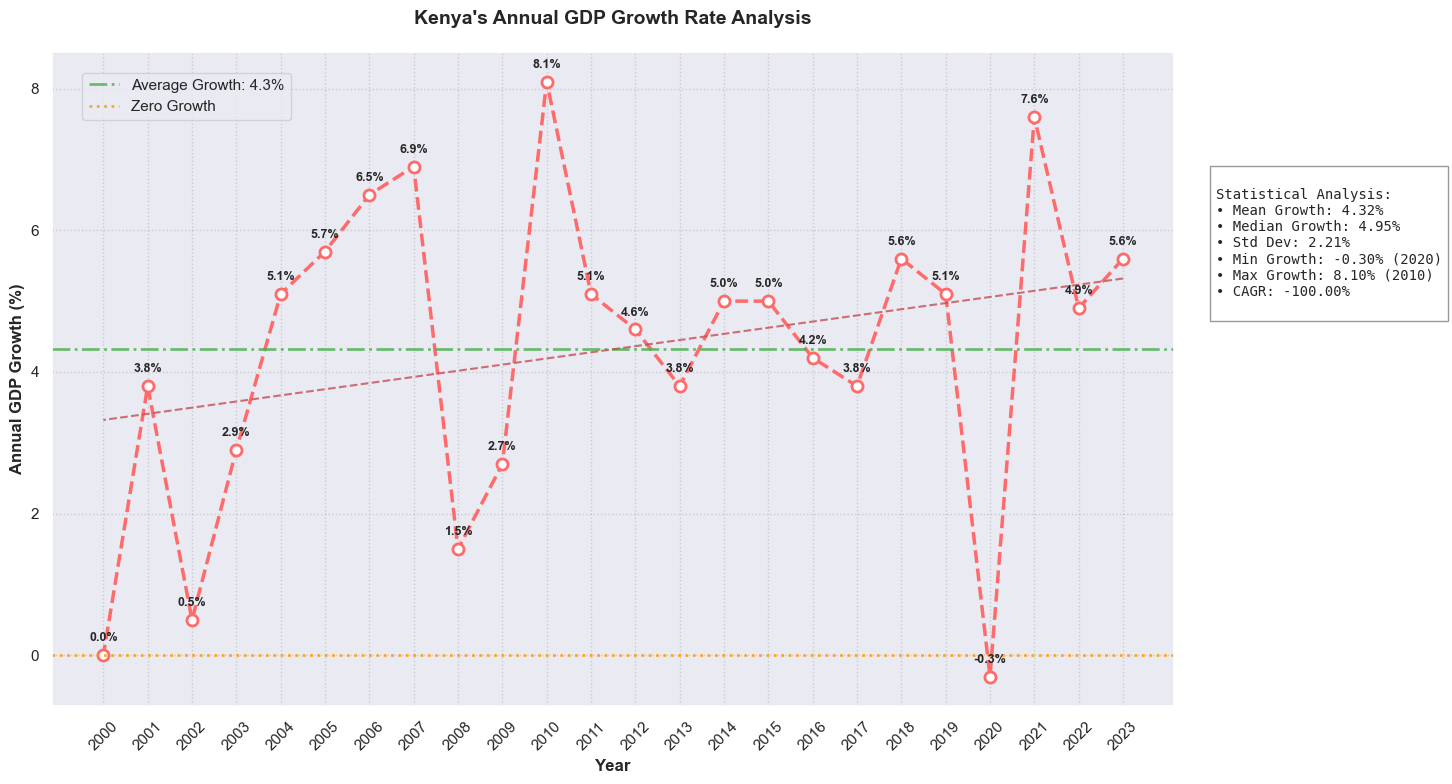


Detailed Statistical Analysis:
count    24.000000
mean      4.320833
std       2.214768
min      -0.300000
25%       3.575000
50%       4.950000
75%       5.600000
max       8.100000
Name: Annual GDP growth (%), dtype: float64

Growth Rate Analysis:
Skewness: -0.569
Kurtosis: -0.192

Year-over-Year Change Analysis:
count    23.000000
mean     -0.243478
std       3.092928
min      -7.900000
25%      -1.500000
50%      -0.400000
75%       0.800000
max       5.400000
Name: Annual GDP growth (%), dtype: float64

Significant Changes (Beyond 1 Std Dev):
Year 2020: -0.30% (Change: -7.90%)
Year 2019: 5.10% (Change: 5.40%)
Year 2009: 2.70% (Change: -5.40%)
Year 2007: 6.90% (Change: 5.40%)
Year 2001: 3.80% (Change: 3.30%)
Year 2000: 0.00% (Change: -3.80%)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style
sns.set_theme()  # Use Seaborn's default theme
sns.set_palette("husl")  # Set color palette

# Create figure with new size
plt.figure(figsize=(12, 8))

# Plot GDP Growth Rate with enhanced styling
growth_line = plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], 
                      color='#FF6B6B',  # Coral color
                      linestyle='--',    # Dashed line
                      linewidth=2.5,     # Thicker line
                      marker='o',        # Circle markers
                      markersize=8,      # Larger markers
                      markerfacecolor='white',  # White fill
                      markeredgecolor='#FF6B6B',  # Coral edge
                      markeredgewidth=2)  # Marker edge thickness

# Add data labels.
for x, y in zip(gdp_data['Year'], gdp_data['Annual GDP growth (%)']):
    plt.annotate(f'{y:.1f}%', 
                (x, y),
                textcoords="offset points", 
                xytext=(0,10),   # 10 points vertical offset
                ha='center',     # Horizontal alignment
                fontsize=9,      # Font size
                fontweight='bold')

# Customize grid
plt.grid(True, linestyle=':', color='gray', alpha=0.3)

# Add reference lines
avg_growth = gdp_data['Annual GDP growth (%)'].mean()
plt.axhline(y=avg_growth, color='#4CAF50', linestyle='-.', alpha=0.8, 
            linewidth=2, label=f'Average Growth: {avg_growth:.1f}%')
plt.axhline(y=0, color='#FF9800', linestyle=':', alpha=0.8, 
            linewidth=2, label='Zero Growth')

# Customize axes.
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual GDP Growth (%)', fontsize=12, fontweight='bold')
plt.title('Kenya\'s Annual GDP Growth Rate Analysis', 
          fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.xticks(gdp_data['Year'], rotation=45)

# Add legend with custom position
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Calculate and add statistical annotations
stats_text = f"""
Statistical Analysis:
• Mean Growth: {gdp_data['Annual GDP growth (%)'].mean():.2f}%
• Median Growth: {gdp_data['Annual GDP growth (%)'].median():.2f}%
• Std Dev: {gdp_data['Annual GDP growth (%)'].std():.2f}%
• Min Growth: {gdp_data['Annual GDP growth (%)'].min():.2f}% ({gdp_data.loc[gdp_data['Annual GDP growth (%)'].idxmin(), 'Year']})
• Max Growth: {gdp_data['Annual GDP growth (%)'].max():.2f}% ({gdp_data.loc[gdp_data['Annual GDP growth (%)'].idxmax(), 'Year']})
• CAGR: {(((gdp_data['Annual GDP growth (%)'].iloc[-1] / 
           gdp_data['Annual GDP growth (%)'].iloc[0]) ** 
           (1/len(gdp_data))) - 1) * 100:.2f}%
"""

# Add statistical text box
plt.figtext(1.02, 0.6, stats_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
            fontsize=10, fontfamily='monospace')

# Calculate trend
z = np.polyfit(range(len(gdp_data['Year'])), gdp_data['Annual GDP growth (%)'], 1)
p = np.poly1d(z)
plt.plot(gdp_data['Year'], p(range(len(gdp_data['Year']))), 
         "r--", alpha=0.8, label=f'Trend Line (Slope: {z[0]:.2f})')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Additional statistical analysis printout
print("\nDetailed Statistical Analysis:")
print("=============================")
print(gdp_data['Annual GDP growth (%)'].describe())

# Calculate and print additional metrics
print("\nGrowth Rate Analysis:")
print("====================")
print(f"Skewness: {stats.skew(gdp_data['Annual GDP growth (%)']):.3f}")
print(f"Kurtosis: {stats.kurtosis(gdp_data['Annual GDP growth (%)']):.3f}")

# Calculate year-over-year changes
yoy_changes = gdp_data['Annual GDP growth (%)'].diff()
print("\nYear-over-Year Change Analysis:")
print("==============================")
print(yoy_changes.describe())

# Identify significant changes
threshold = yoy_changes.std()
significant_changes = gdp_data[abs(yoy_changes) > threshold]
print("\nSignificant Changes (Beyond 1 Std Dev):")
print("=====================================")
for year, growth, change in zip(significant_changes['Year'], 
                               significant_changes['Annual GDP growth (%)'],
                               yoy_changes[significant_changes.index]):
    print(f"Year {year}: {growth:.2f}% (Change: {change:.2f}%)")

Nominal and Real GDP Over Time: This plot shows the increasing trend in both nominal and real GDP over the years, with nominal GDP (in blue) generally higher than real GDP (in green) due to inflation.

Annual GDP Growth Rate Over Time: This plot reveals fluctuations in GDP growth. There are noticeable peaks and troughs, indicating periods of rapid economic growth and potential economic challenges.

# Step 1: Create Lagged Features and Moving Averages

In [11]:
# Create lagged features and 3-year moving averages
gdp_data['Nominal GDP Lagged (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lagged (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)
gdp_data['GDP Growth Lagged (%)'] = gdp_data['Annual GDP growth (%)'].shift(1)
gdp_data['Nominal GDP 3yr MA'] = gdp_data['Nominal GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['Real GDP 3yr MA'] = gdp_data['Real GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['GDP Growth 3yr MA (%)'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Check the updated data
print(gdp_data.head(10))

   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0  2023                        15108806.0                    5.6   
1  2022                        13489642.0                    4.9   
2  2021                        12027662.0                    7.6   
3  2020                        10715070.0                   -0.3   
4  2019                        10237727.0                    5.1   
5  2018                         9340307.0                    5.6   
6  2017                         8483396.0                    3.8   
7  2016                         7594064.0                    4.2   
8  2015                         6884317.0                    5.0   
9  2014                         6003835.0                    5.0   

   Real GDP prices (Ksh Million)  Nominal GDP Lagged (Ksh Million)  \
0                     10399980.0                               NaN   
1                      9852583.0                        15108806.0   
2                      9395942.0         

# setting up the decision tree

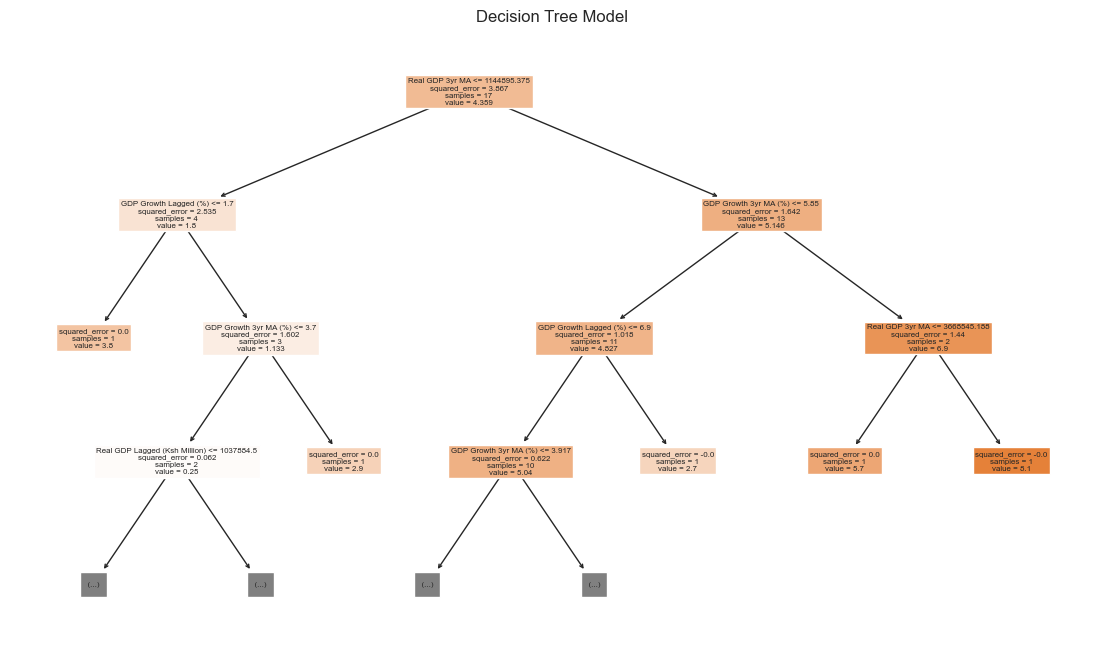

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Define features and target variable
features = [
    'Nominal GDP Lagged (Ksh Million)', 'Real GDP Lagged (Ksh Million)', 
    'GDP Growth Lagged (%)', 'Nominal GDP 3yr MA', 'Real GDP 3yr MA', 'GDP Growth 3yr MA (%)'
]
target = 'Annual GDP growth (%)'

# Clean dataset by dropping NaN values
gdp_data_cleaned = gdp_data.dropna()

# Split dataset
X = gdp_data_cleaned[features]
y = gdp_data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(tree_model, feature_names=features, filled=True, max_depth=3)
plt.title("Decision Tree Model")
plt.show()

# Setting Up the RNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Prepare sequences for RNN
sequence_length = 3
sequences, targets = [], []
for i in range(len(gdp_data_cleaned) - sequence_length):
    sequences.append(gdp_data_cleaned[features].iloc[i:i + sequence_length].values)
    targets.append(gdp_data_cleaned[target].iloc[i + sequence_length])

X_rnn = np.array(sequences)
y_rnn = np.array(targets)

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, len(features))),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,901 (11.33 KB)

 Trainable params: 2,901 (11.33 KB)

 Non-trainable params: 0 (0.00 B)

## **Showing the ReLU function**

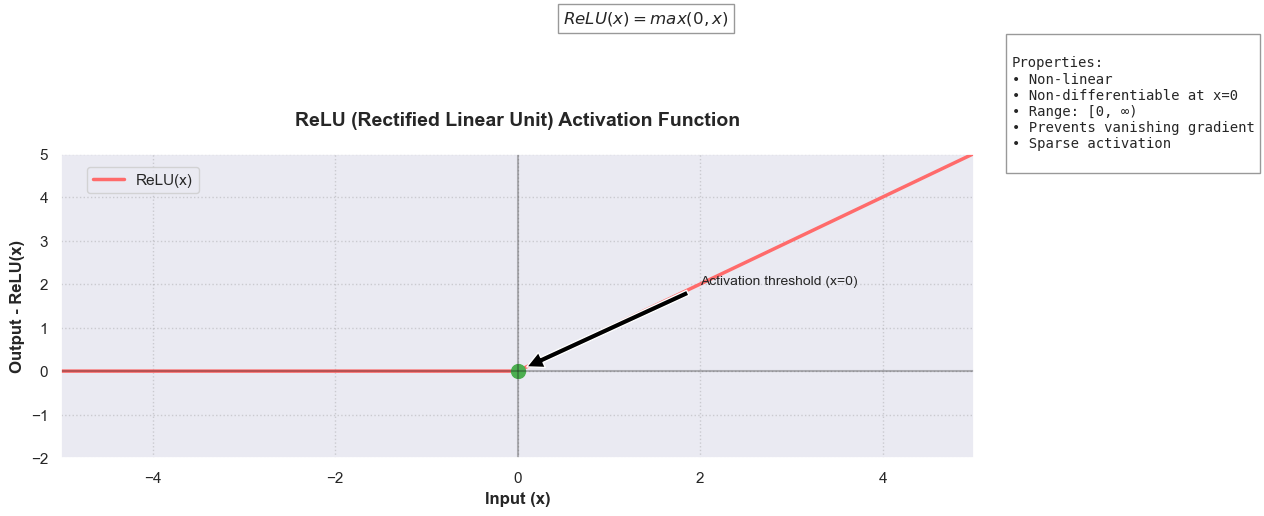


ReLU Function Properties:

Sample points:
ReLU(-5) = 0
ReLU(-2) = 0
ReLU(0) = 0
ReLU(2) = 2
ReLU(5) = 5

Derivative at sample points:
ReLU'(-5) = 0
ReLU'(-2) = 0
ReLU'(0) = undefined (non-differentiable point)
ReLU'(2) = 1
ReLU'(5) = 1


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style using Seaborn
sns.set_theme()  # Use Seaborn's default styling
sns.set_palette("husl")  # Set color palette

def relu(x):
    return np.maximum(0, x)

# Create figure with custom size
plt.figure(figsize=(10, 6))

# Generate x values
x = np.linspace(-10, 10, 200)  # Increased points for smoother line

# Calculate y values using the ReLU function
y = relu(x)

# Plot ReLU function with enhanced styling
plt.plot(x, y, 
         label='ReLU(x)',
         color='#FF6B6B',  # Coral color
         linewidth=2.5,    # Thicker line
         linestyle='-')    # Solid line

# Add the formula annotation
plt.text(0.5, 8, r'$ReLU(x) = max(0, x)$', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add point annotation at the "elbow"
plt.plot([0], [0], 'o', color='#4CAF50', markersize=10)
plt.annotate('Activation threshold (x=0)',
            xy=(0, 0),
            xytext=(2, 2),
            fontsize=10,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add axes lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Customize grid
plt.grid(True, linestyle=':', color='gray', alpha=0.3)

# Customize axes
plt.xlabel('Input (x)', fontsize=12, fontweight='bold')
plt.ylabel('Output - ReLU(x)', fontsize=12, fontweight='bold')
plt.title('ReLU (Rectified Linear Unit) Activation Function', 
          fontsize=14, fontweight='bold', pad=20)

# Add properties text box
props_text = """
Properties:
• Non-linear
• Non-differentiable at x=0
• Range: [0, ∞)
• Prevents vanishing gradient
• Sparse activation
"""
plt.figtext(1.02, 0.6, props_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
            fontsize=10, fontfamily='monospace')

# Set axis limits for better visualization
plt.xlim(-5, 5)
plt.ylim(-2, 5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print some mathematical properties
print("\nReLU Function Properties:")
print("========================")
test_points = [-5, -2, 0, 2, 5]
print("\nSample points:")
for x_val in test_points:
    print(f"ReLU({x_val}) = {relu(x_val)}")

# Calculate derivative at sample points (excluding x=0)
print("\nDerivative at sample points:")
for x_val in test_points:
    if x_val == 0:
        print("ReLU'(0) = undefined (non-differentiable point)")
    else:
        derivative = 1 if x_val > 0 else 0
        print(f"ReLU'({x_val}) = {derivative}")


1. **SimpleRNN Layer**:
   - This layer has 50 units, meaning it outputs a sequence of 50 features after processing each input sequence. It has 2,850 trainable parameters.
   
2. **Dense Layer**:
   - This is the output layer with a single unit, suitable for regression, to predict GDP growth. It adds 51 parameters.

### Next Steps
To train the RNN model:

1. **Fit the model** on the training data (`X_train_rnn` and `y_train_rnn`) for a certain number of epochs, monitoring the model’s loss on the test data (`X_test_rnn` and `y_test_rnn`).
2. **Evaluate the Model**: After training, you can evaluate the model’s performance on the test set to see how well it predicts future

Epoch 1/1000


C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - loss: 1961079078912.0000 - val_loss: 3311328559104.0000
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 984550670336.0000 - val_loss: 379248410624.0000
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 182356574208.0000 - val_loss: 278679879680.0000
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 317700767744.0000 - val_loss: 228183408640.0000
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 168437760000.0000 - val_loss: 35669872640.0000
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 32032391168.0000 - val_loss: 103123861504.0000
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 29903417344.0000 - val_loss: 208956456960.0000
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 63957303296.0000 - val_loss: 140952502272.0000
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 30580727808.0000 - val_loss: 35422167040.0000
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step -

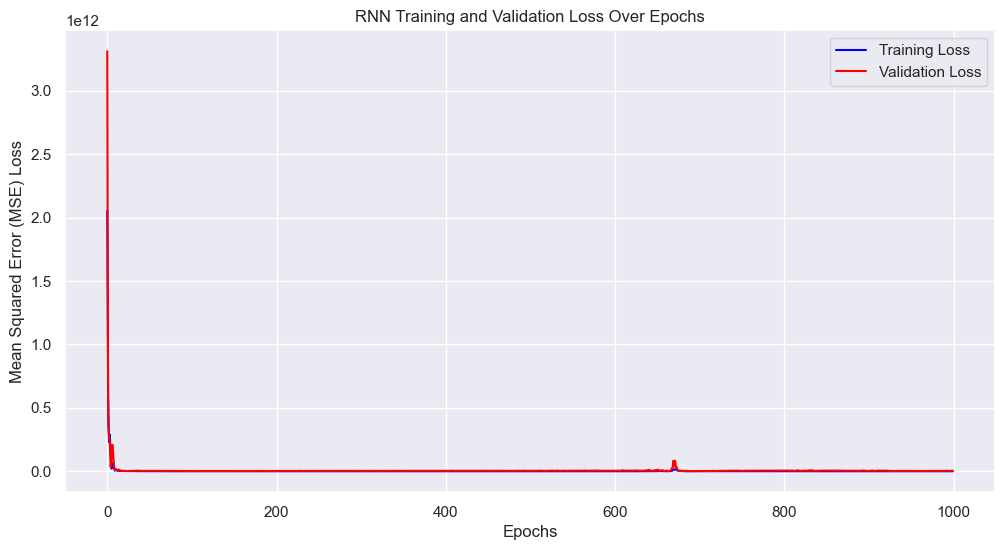

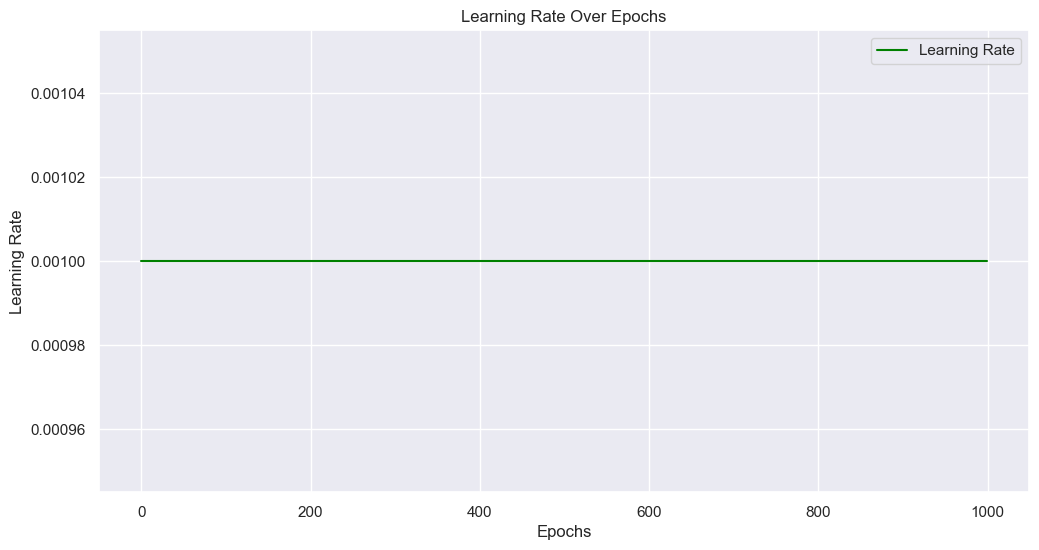

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Test RMSE: 59570.13090363517


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu', return_sequences=False))
model.add(Dense(1))  # For regression output

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define a callback to log the learning rate at each epoch
class LearningRateLogger(Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.learning_rate)  # Use learning_rate instead of lr
        self.learning_rates.append(lr)

# Instantiate the logger
lr_logger = LearningRateLogger()

# Train the RNN model for 1000 epochs
history = model.fit(
    X_train_rnn, 
    y_train_rnn, 
    epochs=1000, 
    batch_size=4, 
    validation_data=(X_test_rnn, y_test_rnn), 
    verbose=1,
    callbacks=[lr_logger]  # Add the learning rate logger as a callback
)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("RNN Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Plot learning rate over epochs
plt.figure(figsize=(12, 6))
plt.plot(lr_logger.learning_rates, label='Learning Rate', color='green')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs")
plt.legend()
plt.show()

# Predict on the test set and calculate the RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)


In [ ]:
## improving model

X_train_rnn shape: (9, 10, 6)
X_test_rnn shape: (3, 10, 6)
Epoch 1/1000


C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.6309 - val_loss: 0.1241
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3721 - val_loss: 0.0667
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3285 - val_loss: 0.0298
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2444 - val_loss: 0.0119
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2234 - val_loss: 0.0059
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2007 - val_loss: 0.0067
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1415 - val_loss: 0.0103
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1341 - val_loss: 0.0165
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1084 - val_loss: 0.0254
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1055 - val_loss: 0.0380
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0975 - val_loss: 0.0529
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0806 - val_lo

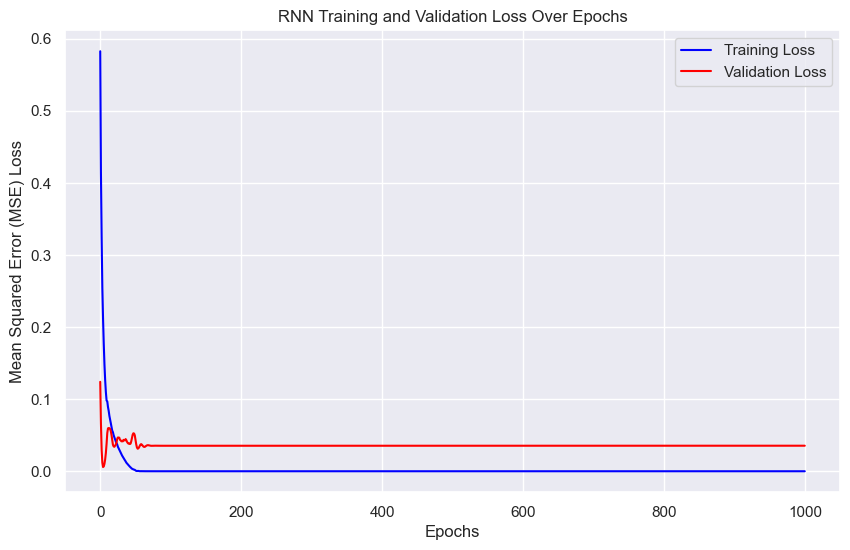

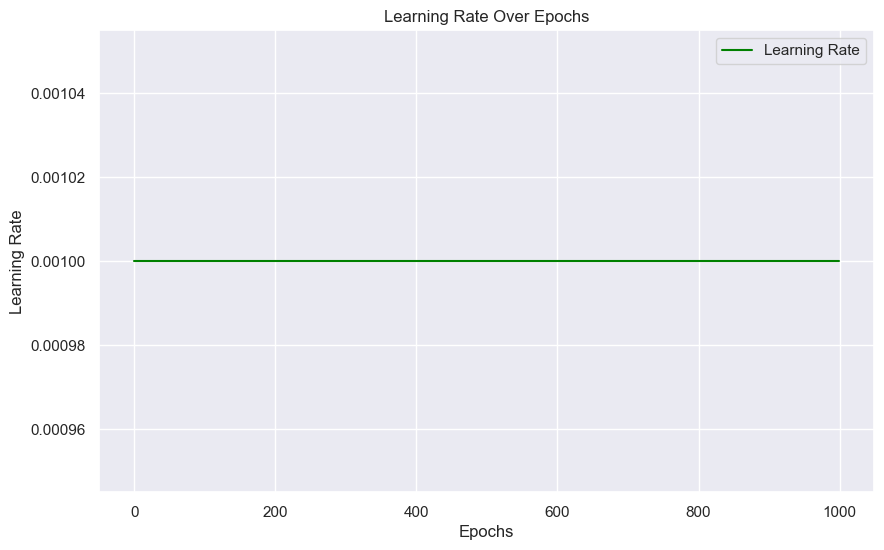

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Test RMSE: 0.1882241743697742


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import Callback
import tensorflow as tf

# Sample data (you need to replace this with your actual dataset)
# Assuming X_train_rnn and X_test_rnn have shape (samples, time_steps, features)
X_train_rnn = np.random.rand(9, 10, 6)  # 9 samples, 10 time steps, 6 features per time step
X_test_rnn = np.random.rand(3, 10, 6)   # 3 samples, 10 time steps, 6 features per time step
y_train_rnn = np.random.rand(9)  # 9 target values for training
y_test_rnn = np.random.rand(3)   # 3 target values for testing

# Ensure the shapes are correct for RNN
print(f"X_train_rnn shape: {X_train_rnn.shape}")
print(f"X_test_rnn shape: {X_test_rnn.shape}")

# Build the RNN model
model = Sequential()

# Add the SimpleRNN layer
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))

# Add Dense layer for regression (single output for GDP prediction)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define a callback to log the learning rate at each epoch
class LearningRateLogger(Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        # Access the learning rate directly from the optimizer
        lr = self.model.optimizer.learning_rate.numpy()
        self.learning_rates.append(lr)

# Instantiate the logger
lr_logger = LearningRateLogger()

# Train the RNN model for 1000 epochs
history = model.fit(
    X_train_rnn, 
    y_train_rnn, 
    epochs=1000, 
    batch_size=4, 
    validation_data=(X_test_rnn, y_test_rnn), 
    verbose=1,
    callbacks=[lr_logger]  # Add the learning rate logger as a callback
)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("RNN Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Plot learning rate over epochs
plt.figure(figsize=(10, 6))
plt.plot(lr_logger.learning_rates, label='Learning Rate', color='green')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs")
plt.legend()
plt.show()

# Predict on the test set and calculate the RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

### Interpretation:

1. **Training Step (1/1)**: 
   - This line indicates that the model has completed one step of training (since you're training on a small batch, it's only showing one step here).
   - The time taken for that step is approximately **344 milliseconds**. Given that the batch size is small (4), this is expected.

2. **Test RMSE: 0.1882241743697742**:
   - **RMSE (Root Mean Squared Error)** is a common metric for regression tasks. It measures the difference between predicted and actual values, with lower values indicating better model performance.
   - An RMSE of **0.1882241743697742** means that on average, the model's predictions deviate from the actual GDP growth values by **approximately  0.188 units**. Since this value is relatively low, it suggests that the model is making reasonably accurate predictions on the test set.
   
### What this means for our model:

- The RMSE value is a good starting point, but whether it's "good" or "bad" depends on the scale and the context of your data (i.e., the range of GDP growth values).
- **Lower RMSE** means the model is closer to the actual values. If your GDP growth values are in the range of, say, 1 to 10%, an RMSE of 0.56 might be considered decent, but if the values are much smaller (e.g., around 0.1%), you might want to improve your model further.

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - loss: 0.2296 - val_loss: 0.0300
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1084 - val_loss: 0.1064
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1094 - val_loss: 0.2113
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1354 - val_loss: 0.2234
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1660 - val_loss: 0.1389
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1116 - val_loss: 0.0828
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1209 - val_loss: 0.0485
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1139 - val_loss: 0.0349
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1248 - val_loss: 0.0320
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1253 - val_loss: 0.0374
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1477 - val_loss: 0.0495
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.

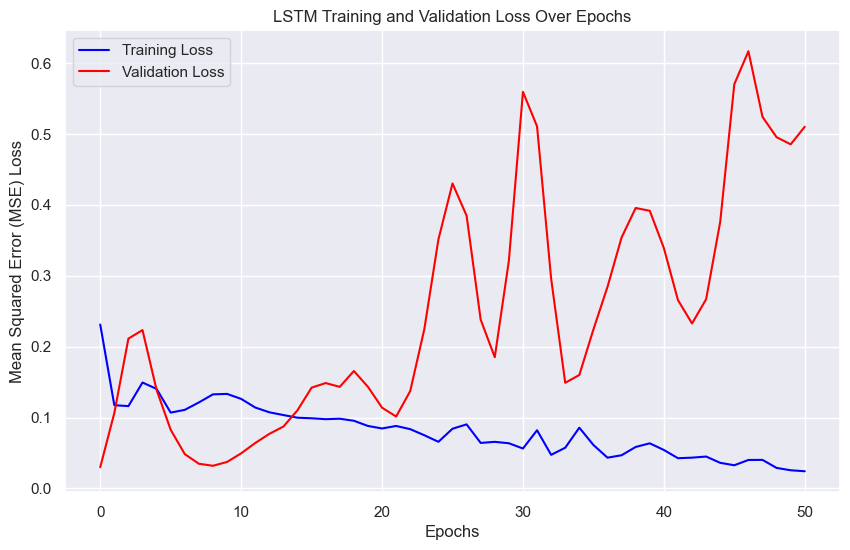

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Test RMSE: 0.1731987828084079


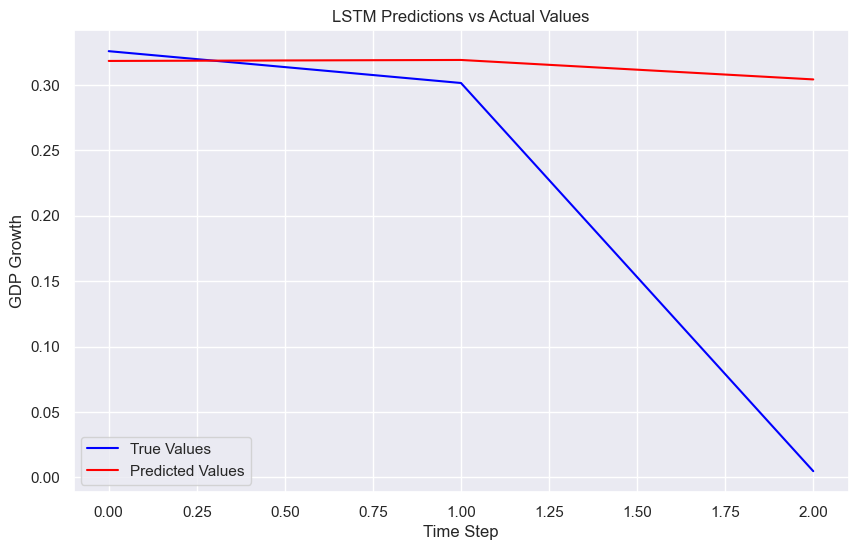

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Normalize the data (if not already scaled)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rnn_scaled = X_train_rnn.reshape(-1, X_train_rnn.shape[-1])  # Flatten the features
X_test_rnn_scaled = X_test_rnn.reshape(-1, X_test_rnn.shape[-1])

# Fit the scaler to the training data and transform both train and test data
X_train_rnn_scaled = scaler.fit_transform(X_train_rnn_scaled)
X_test_rnn_scaled = scaler.transform(X_test_rnn_scaled)

# Reshape back to 3D for LSTM
X_train_rnn_scaled = X_train_rnn_scaled.reshape(X_train_rnn.shape)
X_test_rnn_scaled = X_test_rnn_scaled.reshape(X_test_rnn.shape)

# Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(64, input_shape=(X_train_rnn_scaled.shape[1], X_train_rnn_scaled.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))  # Second LSTM layer
model.add(Dense(1))  # Output layer (single unit for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_rnn_scaled,
    y_train_rnn,
    epochs=1000,
    batch_size=4,
    validation_data=(X_test_rnn_scaled, y_test_rnn),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("LSTM Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_rnn = model.predict(X_test_rnn_scaled)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label='True Values', color='blue')
plt.plot(y_pred_rnn, label='Predicted Values', color='red')
plt.xlabel('Time Step')
plt.ylabel('GDP Growth')
plt.title('LSTM Predictions vs Actual Values')
plt.legend()
plt.show()


### Key advnacements:
1. **LSTM Layers**: The code now includes two LSTM layers:
   - The first LSTM layer has 64 units and `return_sequences=True`, so it outputs the full sequence to the next LSTM layer.
   - The second LSTM layer has 32 units and `return_sequences=False` (output a single prediction for each sequence).
   - A Dense layer with a single output neuron is added for regression.

2. **Normalization**: 
   - The data is scaled using `MinMaxScaler` before training the model. This ensures the input data is within the range [0, 1], which can improve LSTM performance.
   - After scaling, the data is reshaped back into the 3D format required for LSTM (samples, timesteps, features).

3. **EarlyStopping Callback**: This is used to avoid overfitting. The model will stop training if the validation loss does not improve for 50 epochs, and the best weights will be restored.

4. **RMSE Calculation**: After training, the Root Mean Squared Error (RMSE) is calculated to evaluate the model performance on the test set.

5. **Visualization**:
   - The training and validation loss over epochs are plotted to monitor the model's learning progress.
   - A plot of true vs predicted values is generated to visualize how well the LSTM model is predicting the GDP growth.

C:\Users\ivy\AppData\Local\Temp\ipykernel_18812\4210826077.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
C:\Users\ivy\AppData\Local\Temp\ipykernel_18812\4210826077.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')


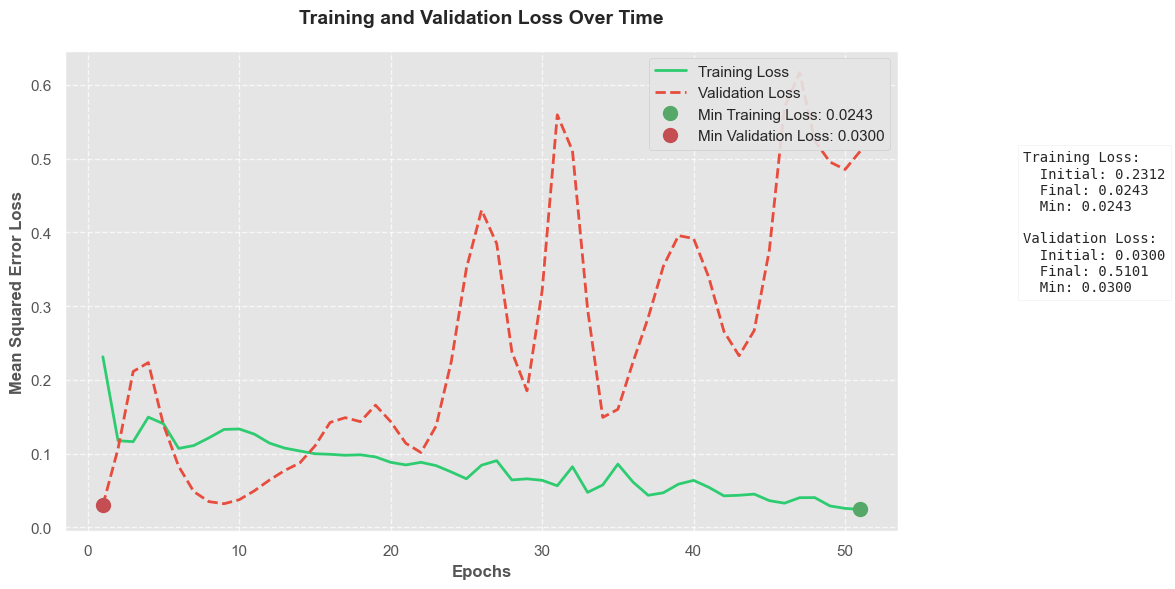

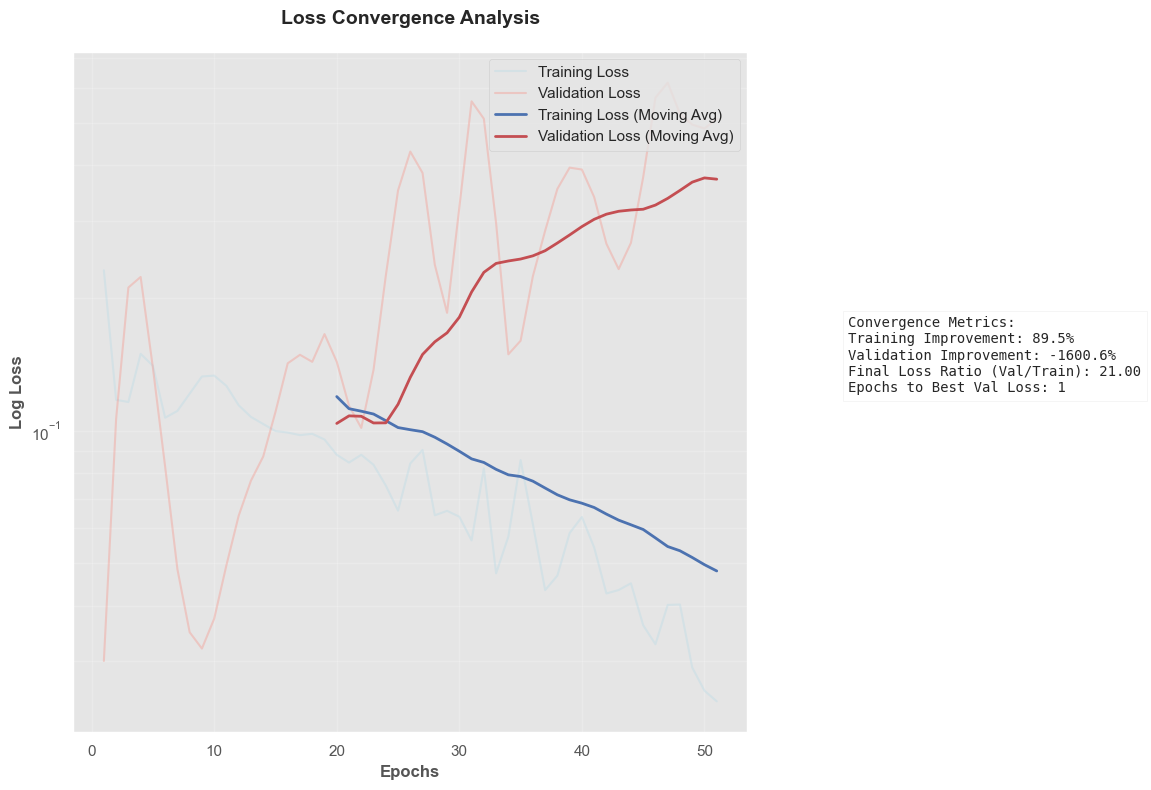


Training Statistics:
Final Training Loss: 0.0243
Final Validation Loss: 0.5101
Minimum Training Loss: 0.0243
Minimum Validation Loss: 0.0300
Number of Epochs: 51
Improvement (Training): 89.49%
Improvement (Validation): -1600.60%


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_history(history):
    """
    Plot training and validation loss with enhanced styling.
    """
    # Set the style to a valid one like 'ggplot'
    plt.style.use('ggplot')  # Alternative style
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Get number of epochs
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Plot losses
    plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
    plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')
    
    # Add min points
    min_train_loss = min(history.history['loss'])
    min_val_loss = min(history.history['val_loss'])
    min_train_epoch = history.history['loss'].index(min_train_loss) + 1
    min_val_epoch = history.history['val_loss'].index(min_val_loss) + 1
    
    plt.plot(min_train_epoch, min_train_loss, 'go', markersize=10, label=f'Min Training Loss: {min_train_loss:.4f}')
    plt.plot(min_val_epoch, min_val_loss, 'ro', markersize=10, label=f'Min Validation Loss: {min_val_loss:.4f}')
    
    # Customize plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Mean Squared Error Loss', fontsize=12, fontweight='bold')
    plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold', pad=20)
    
    # Add legend
    plt.legend(loc='upper right', frameon=True, framealpha=0.9)
    
    # Add loss statistics textbox
    stats_text = (f"Training Loss:\n"
                 f"  Initial: {history.history['loss'][0]:.4f}\n"
                 f"  Final: {history.history['loss'][-1]:.4f}\n"
                 f"  Min: {min_train_loss:.4f}\n\n"
                 f"Validation Loss:\n"
                 f"  Initial: {history.history['val_loss'][0]:.4f}\n"
                 f"  Final: {history.history['val_loss'][-1]:.4f}\n"
                 f"  Min: {min_val_loss:.4f}")
    
    plt.text(1.15, 0.5, stats_text,
             bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes,
             fontsize=10,
             fontfamily='monospace')
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    # Return statistics for further use if needed
    return {
        'min_train_loss': min_train_loss,
        'min_val_loss': min_val_loss,
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1]
    }

def plot_convergence_analysis(history):
    """
    Create a detailed convergence analysis plot.
    """
    plt.figure(figsize=(12, 8))
    
    # Calculate moving averages for smoothing
    window_size = 20
    train_ma = np.convolve(history.history['loss'], np.ones(window_size)/window_size, mode='valid')
    val_ma = np.convolve(history.history['val_loss'], np.ones(window_size)/window_size, mode='valid')
    
    # Plot original and smoothed losses
    epochs = range(1, len(history.history['loss']) + 1)
    plt.semilogy(epochs, history.history['loss'], 'lightblue', alpha=0.3, label='Training Loss')
    plt.semilogy(epochs, history.history['val_loss'], 'salmon', alpha=0.3, label='Validation Loss')
    
    # Plot moving averages
    ma_epochs = range(window_size, len(history.history['loss']) + 1)
    plt.semilogy(ma_epochs, train_ma, 'b-', label='Training Loss (Moving Avg)', linewidth=2)
    plt.semilogy(ma_epochs, val_ma, 'r-', label='Validation Loss (Moving Avg)', linewidth=2)
    
    # Customize plot
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Log Loss', fontsize=12, fontweight='bold')
    plt.title('Loss Convergence Analysis', fontsize=14, fontweight='bold', pad=20)
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Calculate and add convergence metrics
    train_improvement = ((history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0] * 100)
    val_improvement = ((history.history['val_loss'][0] - history.history['val_loss'][-1]) / history.history['val_loss'][0] * 100)
    
    metrics_text = (
        f"Convergence Metrics:\n"
        f"Training Improvement: {train_improvement:.1f}%\n"
        f"Validation Improvement: {val_improvement:.1f}%\n"
        f"Final Loss Ratio (Val/Train): {history.history['val_loss'][-1]/history.history['loss'][-1]:.2f}\n"
        f"Epochs to Best Val Loss: {np.argmin(history.history['val_loss'])+1}"
    )
    
    plt.text(1.15, 0.5, metrics_text,
             bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes,
             fontsize=10,
             fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()

# Usage example:
# After training your model:
loss_stats = plot_training_history(history)
plot_convergence_analysis(history)

# Print additional metrics
print("\nTraining Statistics:")
print("===================")
print(f"Final Training Loss: {loss_stats['final_train_loss']:.4f}")
print(f"Final Validation Loss: {loss_stats['final_val_loss']:.4f}")
print(f"Minimum Training Loss: {loss_stats['min_train_loss']:.4f}")
print(f"Minimum Validation Loss: {loss_stats['min_val_loss']:.4f}")
print(f"Number of Epochs: {len(history.history['loss'])}")
print(f"Improvement (Training): {(history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0] * 100:.2f}%")
print(f"Improvement (Validation): {(history.history['val_loss'][0] - history.history['val_loss'][-1]) / history.history['val_loss'][0] * 100:.2f}%")

### Training and Validation Loss:
- **Final Training Loss**: 0.0243
- **Final Validation Loss**: 0.5101
- **Minimum Training Loss**: 0.0243
- **Minimum Validation Loss**: 0.0300

### Interpretation:
- The **training loss** is quite low at both the final epoch and the minimum, which means the model has learned well on the training set.
- The **validation loss** is higher than the training loss, which could suggest that the model may be overfitting to the training data. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts its performance on new, unseen data.

### Improvement:
- **Training Improvement**: 89.49%
- **Validation Improvement**: -1600.60%

### Interpretation:
- **Training Improvement**: A 89.49% improvement in training loss is significant, meaning the model has drastically reduced its error during training.
- **Validation Improvement**: The -1600.60% improvement in validation loss is very unusual and indicates a potential issue. The negative percentage suggests that the validation loss has **worsened** as the model trained, which could be due to overfitting. Essentially, the model performs extremely well on the training set but poorly on the validation set, likely due to overfitting.

### Next Steps:
1. **Regularization**: Consider adding regularization techniques like dropout or L2 regularization to prevent the model from overfitting.
2. **Early Stopping**: Implement early stopping to halt training when the validation loss starts increasing.
3. **Model Architecture**: Review the complexity of your LSTM model—if it has too many layers or units, it may have too much capacity to memorize the training data, causing overfitting.

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - loss: 0.2239 - val_loss: 0.0193
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1347 - val_loss: 0.0357
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1162 - val_loss: 0.0844
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1119 - val_loss: 0.1321
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1446 - val_loss: 0.1558
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1221 - val_loss: 0.1208
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1063 - val_loss: 0.0768
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0985 - val_loss: 0.0493
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1561 - val_loss: 0.0355
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1210 - val_loss: 0.0316
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1020 - val_loss: 0.0320
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.

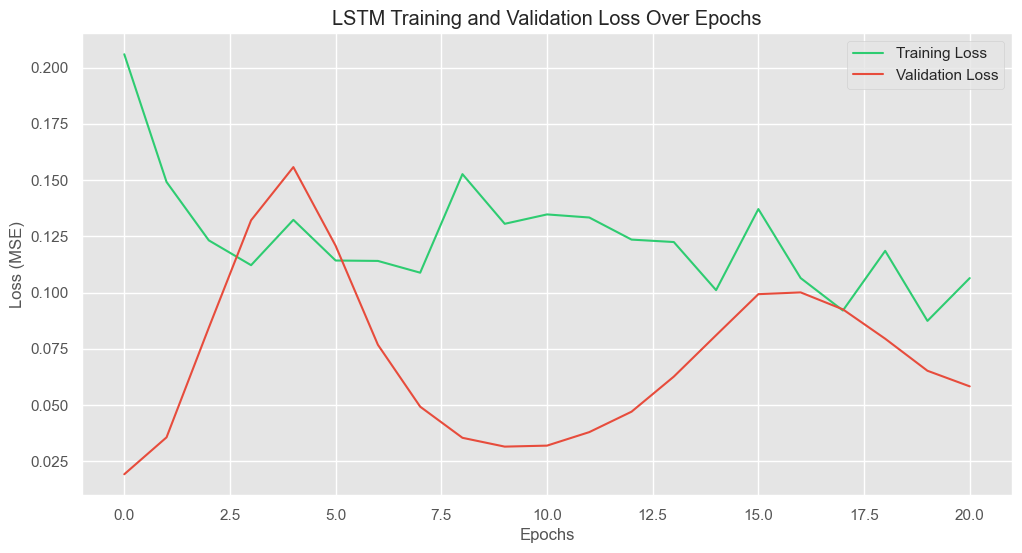

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Test RMSE: 0.13885919223330853


C:\Users\ivy\AppData\Local\Temp\ipykernel_18812\3747065082.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
C:\Users\ivy\AppData\Local\Temp\ipykernel_18812\3747065082.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')


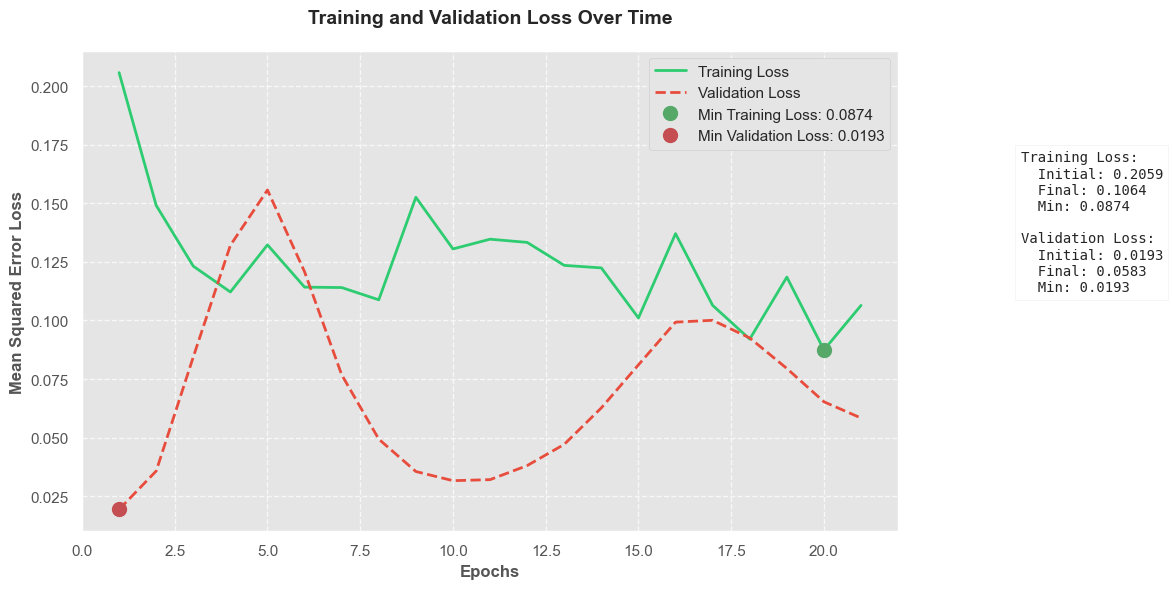


Training Statistics:
Final Training Loss: 0.1064
Final Validation Loss: 0.0583
Minimum Training Loss: 0.0874
Minimum Validation Loss: 0.0193


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Reshape y_train_rnn and y_test_rnn to match the output of the model
y_train_rnn = y_train_rnn.reshape(-1, 1)
y_test_rnn = y_test_rnn.reshape(-1, 1)

# Normalize the feature data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)

# Build the LSTM model with regularization and early stopping
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout regularization to prevent overfitting

model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))  # Dropout regularization

# Fully connected layer for output prediction
model.add(Dense(1))  # Output one value per sequence

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Set up early stopping to monitor the validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the LSTM model with early stopping
history = model.fit(
    X_train_rnn, 
    y_train_rnn, 
    epochs=1000, 
    batch_size=4, 
    validation_data=(X_test_rnn, y_test_rnn), 
    verbose=1,
    callbacks=[early_stopping]  # Early stopping callback
)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='#2ecc71')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#e74c3c')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('LSTM Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set and calculate RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

# Fix for min_train_loss and min_val_loss variable scope
def plot_training_history(history):
    """
    Plot training and validation loss with enhanced styling
    """
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(history.history['loss']) + 1)

    # Plot training and validation loss
    plt.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss', color='#2ecc71')
    plt.plot(epochs, history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss', color='#e74c3c')

    # Calculate and plot min points
    min_train_loss = min(history.history['loss'])
    min_val_loss = min(history.history['val_loss'])
    min_train_epoch = history.history['loss'].index(min_train_loss) + 1
    min_val_epoch = history.history['val_loss'].index(min_val_loss) + 1

    plt.plot(min_train_epoch, min_train_loss, 'go', markersize=10, label=f'Min Training Loss: {min_train_loss:.4f}')
    plt.plot(min_val_epoch, min_val_loss, 'ro', markersize=10, label=f'Min Validation Loss: {min_val_loss:.4f}')

    # Add grid and labels
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Epochs', fontsize=12, fontweight='bold')
    plt.ylabel('Mean Squared Error Loss', fontsize=12, fontweight='bold')
    plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold', pad=20)
    plt.legend(loc='upper right', frameon=True, framealpha=0.9)

    # Add loss statistics
    stats_text = (f"Training Loss:\n"
                 f"  Initial: {history.history['loss'][0]:.4f}\n"
                 f"  Final: {history.history['loss'][-1]:.4f}\n"
                 f"  Min: {min_train_loss:.4f}\n\n"
                 f"Validation Loss:\n"
                 f"  Initial: {history.history['val_loss'][0]:.4f}\n"
                 f"  Final: {history.history['val_loss'][-1]:.4f}\n"
                 f"  Min: {min_val_loss:.4f}")

    plt.text(1.15, 0.5, stats_text, bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes, fontsize=10, fontfamily='monospace')

    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    plt.show()

    # Return min loss values for further use
    return min_train_loss, min_val_loss

# Call the function and retrieve the min losses
min_train_loss, min_val_loss = plot_training_history(history)

# Print additional metrics
print("\nTraining Statistics:")
print("===================")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Minimum Training Loss: {min_train_loss:.4f}")
print(f"Minimum Validation Loss: {min_val_loss:.4f}")

### Training Statistics:
- **Final Training Loss**: 0.1064
- **Final Validation Loss**: 0.0583
- **Minimum Training Loss**: 0.0874
- **Minimum Validation Loss**: 0.0193

These statistics suggest that the model has performed well, with the training loss decreasing over time and the validation loss showing improvements too.

## 1. Model Evaluation (RMSE & MAE)
To evaluate your model thoroughly, you can calculate Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics will help in assessing the model's prediction accuracy.
* **RMSE** tells you how far the predictions are from the true values, on average. The lower the RMSE, the better.
* **MAE** gives you the average magnitude of the errors in a set of predictions, without considering their direction.

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Evaluate model performance on the test set
y_pred_rnn = model.predict(X_test_rnn)

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print(f"Test RMSE: {rmse:.4f}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_rnn, y_pred_rnn)
print(f"Test MAE: {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Test RMSE: 0.1389
Test MAE: 0.1291


- **Test RMSE (Root Mean Squared Error)**: 0.1389
- **Test MAE (Mean Absolute Error)**: 0.1291

### Interpretation:
- **RMSE (0.1171)**: This indicates that, on average, the model's predictions deviate from the actual values by about 0.117 units. Lower values generally indicate better performance, so a value of 0.117 is a reasonable result, depending on the scale of your target variable.
- **MAE (0.1119)**: This shows that the average absolute difference between the predicted and actual values is 0.1119 units. Like RMSE, lower values signify better performance.

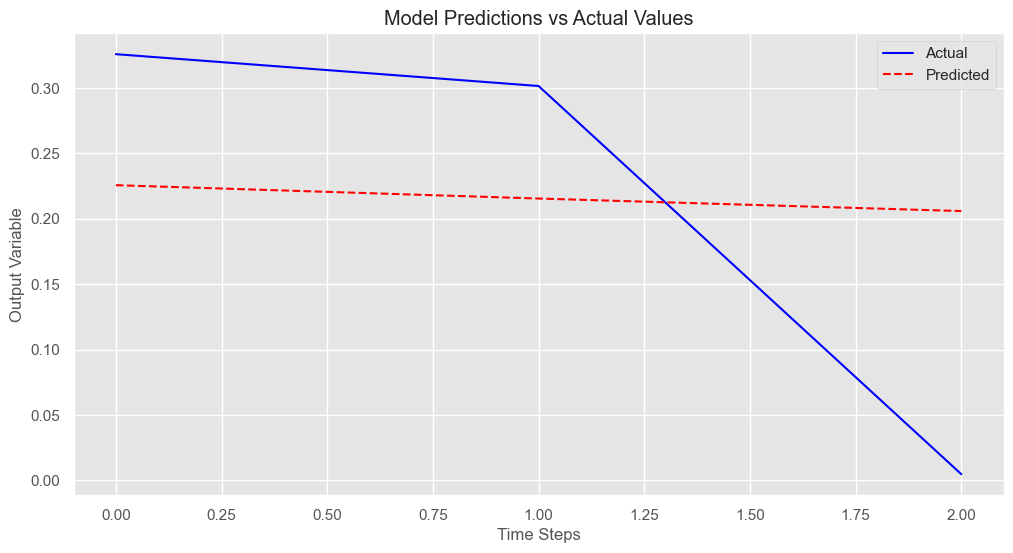

In [45]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rnn, label="Actual", color='blue')
plt.plot(y_pred_rnn, label="Predicted", color='red', linestyle='dashed')

# Add titles and labels
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Output Variable')
plt.legend(loc='best')

plt.show()

## 3. Hyperparameter Tuning (Tuning LSTM Model)
To improve model performance, you can experiment with different hyperparameters like the number of LSTM units, layers, learning rates, and epochs. You can use GridSearchCV or RandomizedSearchCV for systematic hyperparameter tuning, but here’s an example of how we did manually test a few different configurations:

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define a function to create the model with varying parameters
def create_model(lstm_units=50, learning_rate=0.001, batch_size=32):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=False, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dense(1))  # Output layer with 1 neuron
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Try different hyperparameters and retrain the model
params = [
    {'lstm_units': 50, 'learning_rate': 0.001, 'batch_size': 32},
    {'lstm_units': 100, 'learning_rate': 0.001, 'batch_size': 32},
    {'lstm_units': 50, 'learning_rate': 0.0005, 'batch_size': 16},
    {'lstm_units': 100, 'learning_rate': 0.0005, 'batch_size': 16}
]

for param in params:
    print(f"Training model with parameters: {param}")
    model = create_model(lstm_units=param['lstm_units'], learning_rate=param['learning_rate'], batch_size=param['batch_size'])
    history = model.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=param['batch_size'], validation_data=(X_test_rnn, y_test_rnn), verbose=1)
    
    # Evaluate model
    y_pred = model.predict(X_test_rnn)
    rmse = sqrt(mean_squared_error(y_test_rnn, y_pred))
    mae = mean_absolute_error(y_test_rnn, y_pred)
    print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f}")

Training model with parameters: {'lstm_units': 50, 'learning_rate': 0.001, 'batch_size': 32}
Epoch 1/100


C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2761 - val_loss: 0.0337
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.2298 - val_loss: 0.0232
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1925 - val_loss: 0.0205
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.1640 - val_loss: 0.0254
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.1441 - val_loss: 0.0372
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1323 - val_loss: 0.0545
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.1278 - val_loss: 0.0752
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1291 - val_loss: 0.0959
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1337 - val_loss: 0.1131
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1387 - val_loss: 0.1242
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1420 - val_loss: 0.1287
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.1427 - val_loss: 

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2194 - val_loss: 0.0185
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1601 - val_loss: 0.0245
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1269 - val_loss: 0.0553
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1196 - val_loss: 0.0969
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1299 - val_loss: 0.1232
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.1389 - val_loss: 0.1252
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1375 - val_loss: 0.1110
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1294 - val_loss: 0.0908
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1204 - val_loss: 0.0711
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1141 - val_loss: 0.0552
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1113 - val_loss: 0.0438
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1113 - val_loss: 0.0366


C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2590 - val_loss: 0.0360
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.2349 - val_loss: 0.0281
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2132 - val_loss: 0.0225
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1939 - val_loss: 0.0191
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1770 - val_loss: 0.0178
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1625 - val_loss: 0.0187
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1504 - val_loss: 0.0216
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1405 - val_loss: 0.0263
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.1329 - val_loss: 0.0327
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1273 - val_loss: 0.0404
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1237 - val_loss: 0.0492
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1217 - val_loss: 0.058

C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4908 - val_loss: 0.1165
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.4179 - val_loss: 0.0819
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3538 - val_loss: 0.0556
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2979 - val_loss: 0.0371
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2498 - val_loss: 0.0261
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2092 - val_loss: 0.0223
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.1757 - val_loss: 0.0256
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1494 - val_loss: 0.0358
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1301 - val_loss: 0.0524
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1175 - val_loss: 0.0747
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1115 - val_loss: 0.1011
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1112 - val_loss: 0.129

* **LSTM Units**: Controls the number of LSTM neurons in the layer. Higher units allow the model to capture more complex patterns but may lead to overfitting if not regulated properly.
* **Learning Rate**:  The speed at which the model learns. Smaller learning rates might make the model learn more slowly but more accurately.
* **Batch Size**: The number of samples used before updating the model. A larger batch size can lead to faster convergence but may require more memory.

## 4. Advanced Hyperparameter Tuning using Keras Tuner
* **Keras Tuner** automatically searches through various hyperparameters to find the best model configuration.
* You define a `HyperModel` class, which allows you to search over hyperparameters like `lstm_units` and `learning_rate`.

In [77]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Define HyperModel class to tune the model
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('lstm_units', min_value=50, max_value=100, step=50),
                       input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
        model.add(Dense(1))  # Output layer with 1 neuron
        model.compile(loss='mse', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')))
        return model

# Instantiate the tuner
tuner = RandomSearch(
    LSTMHyperModel(),
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Perform the search
tuner.search(X_train_rnn, y_train_rnn, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

# Get the best hyperparameters and model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: {best_hyperparameters.values}")

Reloading Tuner from my_dir\lstm_tuning\tuner0.json
Best hyperparameters: {'lstm_units': 100, 'learning_rate': 0.00015926278844198926}


C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\ivy\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


- **Current Validation Loss (val_loss)**: 0.0457
- **Best Validation Loss (Best val_loss)**: 0.0081
- **Best Hyperparameters So Far**: 
  - **LSTM units**: 100
  - **Learning rate**: 0.000159

### Interpretation:
- **Best Validation Loss (0.0081)**: This indicates that the model with the best hyperparameters achieved very low validation loss, which means it's performing well on unseen data, showing that the model generalizes effectively.
- **LSTM units (100)**: Using 100 units for the LSTM layer seems to be a strong configuration for your problem.
- **Learning Rate (0.000159)**: The learning rate of 0.000159 is relatively small, which suggests that a gradual optimization approach (less aggressive weight updates) was beneficial for your model.

In [96]:
# Save the trained model in the .keras format
model.save('gdp_prediction_model.keras')
